In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

C:\Users\tmachine\AppData\Local\Temp\ipykernel_19964\3214131316.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
Data = keras.datasets.fashion_mnist

In [3]:
Data

<module 'keras.api._v2.keras.datasets.fashion_mnist' from 'c:\\Users\\tmachine\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\fashion_mnist\\__init__.py'>

In [4]:
((X_train,y_train),(X_test,y_test)) = Data.load_data()

In [5]:
print(X_train.shape)

(60000, 28, 28)


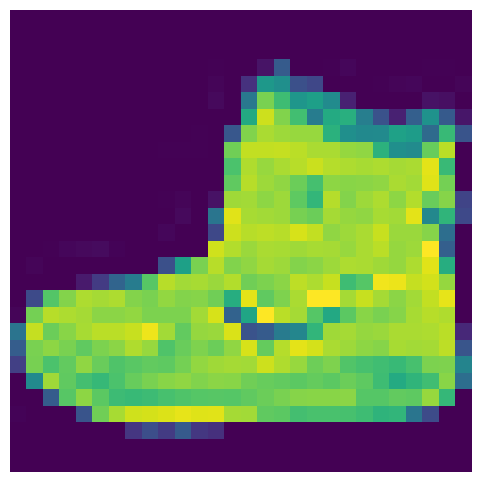

In [7]:
plt.figure(figsize=(10,6))
plt.imshow(X_train[0])
plt.axis('off')
plt.show()

In [8]:
X_train = X_train/255
X_test = X_test/255

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [11]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10


1875/1875 [==============================] - 2s 822us/step - loss: 0.5771 - accuracy: 0.8024
Epoch 2/10
1875/1875 [==============================] - 2s 824us/step - loss: 0.4301 - accuracy: 0.8498
Epoch 3/10
1875/1875 [==============================] - 2s 812us/step - loss: 0.3940 - accuracy: 0.8605
Epoch 4/10
1875/1875 [==============================] - 2s 811us/step - loss: 0.3711 - accuracy: 0.8684
Epoch 5/10
1875/1875 [==============================] - 2s 816us/step - loss: 0.3537 - accuracy: 0.8728
Epoch 6/10
1875/1875 [==============================] - 1s 798us/step - loss: 0.3405 - accuracy: 0.8775
Epoch 7/10
1875/1875 [==============================] - 2s 842us/step - loss: 0.3304 - accuracy: 0.8818
Epoch 8/10
1875/1875 [==============================] - 1s 800us/step - loss: 0.3216 - accuracy: 0.8845
Epoch 9/10
1875/1875 [==============================] - 2s 802us/step - loss: 0.3138 - accuracy: 0.8862
Epoch 10/10
1875/1875 [==============================] - 2s 80

In [12]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 753us/step - loss: 0.3659 - accuracy: 0.8691


[0.36592110991477966, 0.8690999746322632]

In [14]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)

In [18]:
cnn = keras.Sequential([
    keras.layers.Conv2D(32,(3,3),input_shape=(28,28,1),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64,(3,3),input_shape=(28,28,1),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(80,(3,3),input_shape=(28,28,1),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [19]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 951us/step - loss: 0.2998 - accuracy: 0.8908
Epoch 2/10
1875/1875 [==============================] - 2s 857us/step - loss: 0.2927 - accuracy: 0.8932
Epoch 3/10
1875/1875 [==============================] - 2s 832us/step - loss: 0.2886 - accuracy: 0.8958
Epoch 4/10
1875/1875 [==============================] - 2s 844us/step - loss: 0.2843 - accuracy: 0.8967
Epoch 5/10
1875/1875 [==============================] - 2s 851us/step - loss: 0.2792 - accuracy: 0.8980
Epoch 6/10
1875/1875 [==============================] - 2s 837us/step - loss: 0.2752 - accuracy: 0.8999
Epoch 7/10
1875/1875 [==============================] - 2s 839us/step - loss: 0.2706 - accuracy: 0.8998
Epoch 8/10
1875/1875 [==============================] - 2s 830us/step - loss: 0.2677 - accuracy: 0.9020
Epoch 9/10
1875/1875 [==============================] - 2s 841us/step - loss: 0.2643 - accuracy: 0.9030
Epoch 10/10
1875/1875 [==============================] - 2s 836u

In [20]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 731us/step - loss: 0.3615 - accuracy: 0.8727


[0.36146271228790283, 0.8726999759674072]